<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Gasser Elbanna
<br>Group member2: Louise Placidet
<br>Group member3: Milo Imbeni

# Ex1: Create your favorite neuron

<font size ="3">Write some code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. One dendrite with three branches and the other with four branches. Show the resulting model. [0.5 pts]


|----------|       soma(0-1)
            `---------|       dend1(0-1)
                       `---------|       dend_branch1(0-1)
                       `---------|       dend_branch2(0-1)
                       `---------|       dend_branch3(0-1)
            `---------|       dend2(0-1)
                       `---------|       dend_branch4(0-1)
                       `---------|       dend_branch5(0-1)
                       `---------|       dend_branch6(0-1)
                       `---------|       dend_branch7(0-1)
 `---------|       axon(0-1)

Wrote cell 0 to cell_trial.swc


1.0

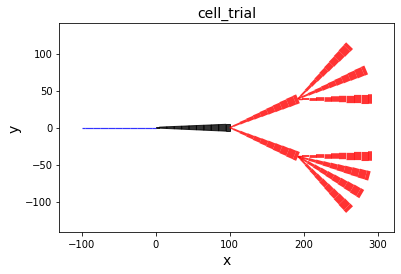

In [ ]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

# Creating Neuron Sections
soma, dend1, dend2, db1, db2, db3, db4, db5, db6, db7, axon = [h.Section(name=n) for n in ['soma', 'dend1', 'dend2', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'dend_branch4', 'dend_branch5', 'dend_branch6', 'dend_branch7', 'axon']]

# Geometry 
for sec in h.allsec():
    if sec == 'soma':
        sec.L = sec.diam = 15
    else:
        sec.nseg = 10
        sec.L = 100
        for seg in sec:
            seg.diam = numpy.interp(seg.x, [0, 1], [1, 10])

# Connecting Sections
dend1.connect(soma(1))
dend2.connect(soma(1))

db1.connect(dend1(1))
db2.connect(dend1(1))
db3.connect(dend1(1))

db4.connect(dend2(1))
db5.connect(dend2(1))
db6.connect(dend2(1))
db7.connect(dend2(1))

axon.connect(soma(0))
h.topology()
        

neuron2swc('cell_trial.swc', swap_yz=False)
neuron_trial = nm.load_neuron('cell_trial.swc')
viewer.draw(neuron_trial)

# In your laptop
# Visualize in the Neuron GUI
s = h.Shape()
s.show(False)

# Ex2: Visualizing neurons

<font size ="3">Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. [1.5 pts]

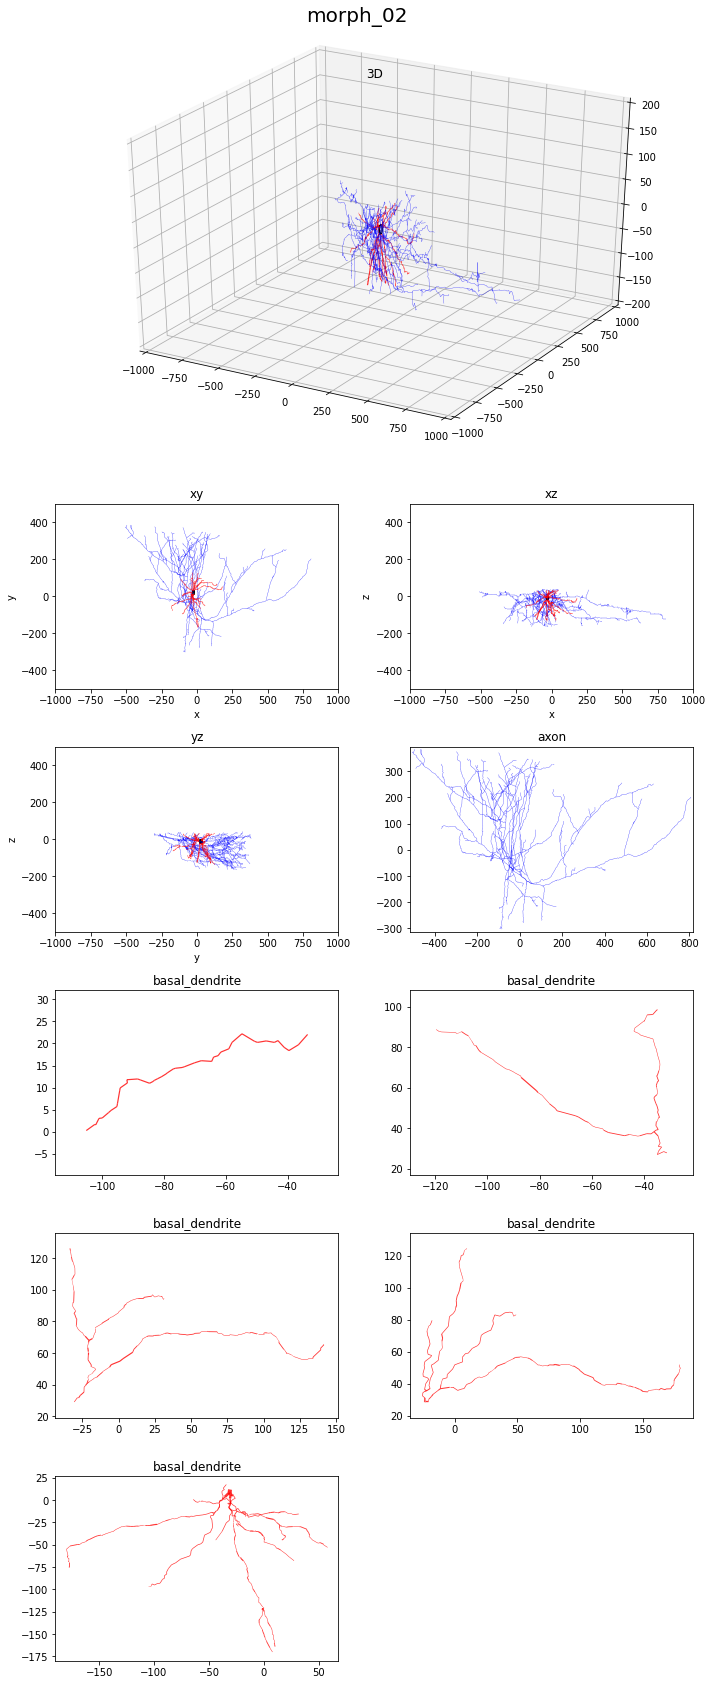

In [ ]:
import neurom as nm
from neurom import viewer
from neurom.view import view
from neurom.view.common import update_plot_limits
import matplotlib.pyplot as plt

#Get Neuron Path, Load Neuron Morphology, Extract Neurites from Neuron object
nrn = 'Group_01/00/morph_02.swc'
neuron = nm.load_neuron(nrn)
neurites = neuron.neurites

# Create Figure to include all subplots
fig = plt.figure(figsize=(10, 40))

# Plot neuron in 3D in a subplot
axes = fig.add_subplot(12, 2, (1,4), projection='3d') # Add to the last subplot
nm.viewer.plot_neuron3d(axes, neuron)
axes.set_ylim((-1000, 1000))
axes.set_xlim((-1000, 1000))
axes.set_zlim(-200,200)
axes.set_title('3D')

# Plot Neuron in 2D in 3 planes
planes = ['xy', 'xz', 'yz']
for i, plane in enumerate(planes):
    axes = fig.add_subplot(12, 2, i+5)
    nm.viewer.plot_neuron(axes, neuron, plane=plane)
    axes.set_ylim((-500, 500))
    axes.set_xlim((-1000, 1000))
    axes.set_title(str(plane))

# Plot Neurites separately
for i, neurite in enumerate(neurites):
    current_axes = fig.add_subplot(12, 2, i+8)
    view.plot_tree(current_axes, neurite, plane='xy')
    update_plot_limits(current_axes, white_space=10)
    current_axes.set_title(str(neurite.type).split('.')[1])

# set a global title for the figure
fig.suptitle(neuron.name, y=1, fontsize=20)
fig.tight_layout()

# Ex3: Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. [1.5 pts]

In [34]:
# The structural checks concern the valid structure of a morphology.
# The neuron_checks are more specific to simulation.
# Options set the tolerance parameters for the checks.

config = {
    'checks': {
        'structural_checks': [
            'is_single_tree',
            'has_valid_soma',
            'has_soma_points',
            'has_sequential_ids',
            'has_increasing_ids',
            'has_valid_neurites',
            'no_missing_parents',
            'has_all_finite_radius_neurites'
        ],
        'neuron_checks': [
            'has_axon',
            'has_basal_dendrite',
            'has_apical_dendrite',
            'has_no_jumps',
            'has_no_fat_ends',
            'has_nonzero_soma_radius',
            'has_all_nonzero_neurite_radii',
            'has_all_nonzero_section_lengths',
            'has_all_nonzero_segment_lengths',
        ]
    },
    'options': {
        'has_nonzero_soma_radius': 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    }
}

In [39]:
import os
from neurom.check.runner import CheckRunner

# Create a "CheckRunner" object by providing the configuration dictionary
check_runner = CheckRunner(config)

# Run on a directory or a morphology
# Atention: change path_to_neurons to the path in which you have placed the files

directory = './Group_01/00/'

for filename in os.listdir(directory):
    if filename.endswith(".swc"): 
        
        path_to_neurons = directory+filename
        results = check_runner.run(path_to_neurons)
        print('Checking for morphology: '+str(filename))
        
        for morph in results['files']:
            print ("Morphology: {} \n".format(morph))
            checks_dict = results['files'][morph]

            # Empty strings for our results
            passed = ""
            failed = ""

            # Iterate over dictionary's items
            for check_name, status in checks_dict.items():
                
                # The string with the check's name and status
                string = "\t{0: <50} : {1}\n".format(check_name, status)
                
                # Separate passed from failed checks
                if status is True:
                    
                    passed += string # Concatenates to the current passed string
                
                else:
                    
                    failed += string # Concatenats to the current failed string
               
            print (passed)
            print (failed)
        
        continue
        
    else:
        print("Encountered a file which did not end with swc")
        break

Checking for morphology: morph_01.swc
Morphology: Group_01/00/morph_01.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True

	Has apical dendrite                 

According to the check runner, the files which did not pass the tests and presented errors were:
    - morph_01.swc
    - morph_02.swc
    - morph_03.swc
    - morph_04.swc
    - morph_05.swc
    - morph_08.swc
    - morph_10.swc
    
The errors which were detected were the following:
    - has apical dendrite
    - has no jumps
    - has all finite radius neurites
    - has all nonzero neurite radii
    - has axon
    - has no fat ends
    

The first error detected by the check runner indicates that the neuron has no apical dendrite associated to it.  The reason behind this error could be that it was either mislabeled or it was not found because cut off or belonging to another slice.  To correct this mistake, one should go back to the 3D reconstruction and see if it was not mis-labeled or to the neighboring slices to see if the apical dendrite was not cut off.  Another explanation for this lack of apical dendrite could also be that it was not distinguished from the basal dendrite, or that given the diversity of neuronal shapes, the neurons may not have apical dendrites.

The second error indicates that there are jumps present in the tracing of the 3D reconstruction.  One solution could be to connect segments that are the closest, in a "best guess" manner.  Another way would be to go back to the tracing and identify the jumps and connect the segments correctly by hand.

The third error reveals that some of the neurites do not have finite radius.  This checks if there are points with zero radius, meaning that the tracing connected two points where there was no neurite, or the diameter of the neurite was too small.  One way to correct this would be going back to the sample and examining it.

The fourth error indicates that some  neurites have zero radius, meaning that some of the tracing do not actually contain dendrites, or the dendrites have radius which have shrunk too much.  Similarly to the previous examples, a solution would be going back to the sample for closer examiniation and seeing if the neurite was cut off (another slice), or the tracing simply does not correspond.

The fith error indicates that one morphology did not have an axon.  This error might be due to the fact that it was either misclassified or that it was not contained in the observed slice.  To solve this, one must go back to the sample and identify the issue.

The final error indicates that some of the morphologies contain fat ends.  This could also be due to the fact that the ends were cut off so they do not converge to a point, but actually continue on to other slices.   Similarly, it is advised to go back to the slice to see more precisely if it was indeed cut off.

# Ex4: Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Represent the result of all the cells using histograms. Find the morphometric charachteristics that best enable you to classify the cells into different groups. Would using a combination of morphometric characteristics improve the classification? Plot the results in a scatter plot[2.5 pts]

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex3 and Ex4.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://watermark.silverchair.com/bhy339.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAnwwggJ4BgkqhkiG9w0BBwagggJpMIICZQIBADCCAl4GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjL2dxX4XnctI8PSkAgEQgIICL871rzxAccwBPnWDWJYXnmhez2c206RYVCnDmVVfJdui3Y0__27wwcSCeSvs8bMO-ySrUsntk8bkKC0g0_2zqK9F-IRlkpL4X120sWQoyjsnZSRgpQgBRjhTGqEiQFSv6VpT1NS7tw8Ytgz0nxRzd6uVmAJmm4hA3Qt6xerIeKCuUP2LZhWFPCkCqY9Z6vrTWs31nKibrYQyhfebtfrjQUXZM41f-jg19pGQW353OY8X8EHbnlzljAF25bPO1dFcoJ9z1YrIavhUJvrC_ROcrQ_xFpf43nLKtv44PxSR8ynIh1W87NKQjMy09q_SeEqL2rQcbMm_GxJp11_T39iAZeoghTOsj9nbJM1DcZ_EHiPDUimGWP-zX3GgPa5OFMYDW99UlS7aoEhLUMeNOagm1McT8U3SYyKYUSmKuWbxSE4vzzl6i4kfVTZinPCc2pJUO7foA11nzp8Od-BadQFDv4oC306nDSWJWe62Y4qbGmzR4MLnO_Gunf9wmszwyNHckn81sxPmTBmnTKYkYNJLUGjZFluRgw_Ssjvk42kBawDJ338-CdN0zTm7paxSSDTu32ZKLLaEjchehmkt5ecY3qn5cNXgAo-BGoMDN2Cl9h5F_NZlR4vTg2B3vRKKmKfjt1tLqoG8K4FrO3LNE8cmCZ-f3iFGSeDOD_VMFb5O0q68uqnlfRN6Ep56WChWSWRS92wNhGx7rUQAOvK7dJWK7oIPaxXBh55_RpZn2BQI0WQ)